In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import requests
import urllib
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image

## Data Loading

In [3]:
data=pd.read_csv("Data/train.csv")

In [4]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
def filter_tweet(text,pattern):
    """
    This is used to remove Twitter Handles- @User from the text
    """
    # re.findall finds all the pattern i.e @user from the text
    r=re.findall(pattern,text)
    
    for i in r:
        # re.sub removes the pattern from the text
        text=re.sub(i," ",text)
    return text

## Data Preprocessing

In [6]:
#Romoves the pattern i.e @user
data["ftr_tweet"]=np.vectorize(filter_tweet)(data['tweet'],r"@[\w]*")
#Removes all special Characters, numbers and punctuations
data["ftr_tweet"]=data["ftr_tweet"].str.replace("[^a-zA-Z#]"," ")
# Coverts the text into lowercase
data["ftr_tweet"]=data['ftr_tweet'].str.lower()
# Romoves words with length less than 3
data["ftr_tweet"]=data['ftr_tweet'].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))
#Tokenization i.e splitting of splitting of string text into individual terms or words
token= data['ftr_tweet'].str.split()
#stemming i.e rocess of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
ps=PorterStemmer()
token =token.apply(lambda x: [ps.stem(word) for word in x if not word in stopwords.words("English")])
#joining the words into string text
for i in range(len(token)):
    token[i]=" ".join(token[i])
data["ftr_tweet"]=token

In [7]:
data

,id,label,tweet,ftr_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap mantl genuin hero ...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn


## Data Visualization

### Positive Tweets

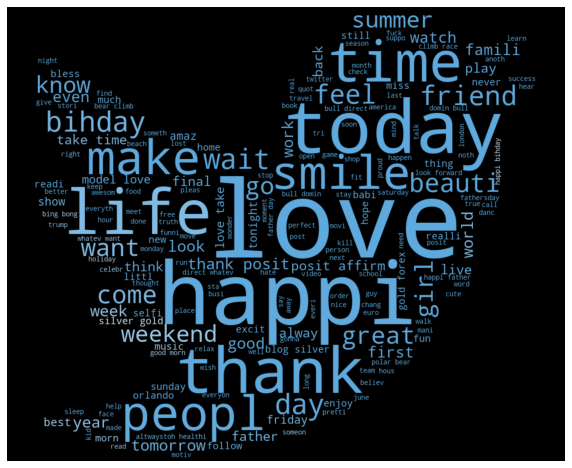

In [8]:
# Segregating All the postive tweets
all_positve=" ".join(word for word in data['ftr_tweet'][data['label']==0])
# Combining image with datset
mask= np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png',stream=True).raw))
# Imposing the color of the image over wordcloud
image_pos=ImageColorGenerator(mask)
wc=WordCloud(background_color='black',height=1500,width=4000,mask=mask).generate(all_positve)

plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=image_pos),interpolation='hamming')
plt.axis('off')
plt.show()

### Negative Tweets

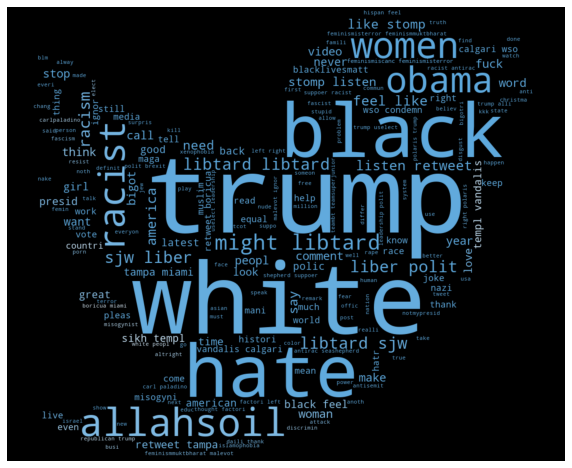

In [9]:
# Segregating All the postive tweets
all_negative=" ".join(word for word in data['ftr_tweet'][data['label']==1])
# Combining image with datset
mask= np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png',stream=True).raw))
# Imposing the color of the image over wordcloud
image_pos=ImageColorGenerator(mask)
wc=WordCloud(background_color='black',height=1500,width=4000,mask=mask).generate(all_negative)

plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=image_pos),interpolation='hamming')
plt.axis('off')
plt.show()

## Extraction of data from cleened Tweets
There are two ways through which it can be achieved-
  1. Bag Of Words
  2. TF-IDF( Term Frequency- Inverse Document Frequecy)

### Bag Of Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
ct=CountVectorizer(max_df=0.9,min_df=2,max_features=1500,stop_words="english")
# Bag Of Words Matrix
x_bf=ct.fit_transform(data['ftr_tweet']).toarray()
y_bf=data.iloc[:,1].values

### TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tf=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1500,stop_words="english")
# Bag Of Words Matrix
x_td=tf.fit_transform(data['ftr_tweet']).toarray()
y_td=data.iloc[:,1].values

## Splitting data into training and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_bf,y_bf,test_size=0.2,random_state=0)
x_train_td,x_test_td,y_train_td,y_test_td=train_test_split(x_td,y_td,test_size=0.2,random_state=0)

## Machine Learning Model Selection
   To train annd test the data we use Logistic Regression

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

#### Bag Of Words

In [17]:
lg1= LogisticRegression(random_state=0,max_iter=400)
lg1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred=lg1.predict(x_test)

In [19]:
# Prints the confusion matrix
confusion_matrix(y_test,y_pred)

array([[5932,   53],
       [ 226,  182]], dtype=int64)

In [20]:
# Calculating the F1-Score
f1_leg_bw=f1_score(y_test,y_pred)
f1_leg_bw

0.5660964230171074

#### TF-IDF

In [21]:
lg2= LogisticRegression(random_state=0,max_iter=400)
lg2.fit(x_train_td,y_train_td)

y_pred=lg2.predict(x_test_td)

In [22]:
# Prints the confusion matrix
confusion_matrix(y_test_td,y_pred)

array([[5955,   30],
       [ 252,  156]], dtype=int64)

In [23]:
# Calculating the F1-Score
f1_leg_td=f1_score(y_test_td,y_pred)
f1_leg_td

0.5252525252525252

In [24]:
title=["Logistic Reg(BOF)","Logistic Reg(TF-IDF)"]
f1=[f1_leg_bw,f1_leg_td]
model=pd.DataFrame({"model":title,"F1-Score":f1},index=[i for i in range(1,3)])

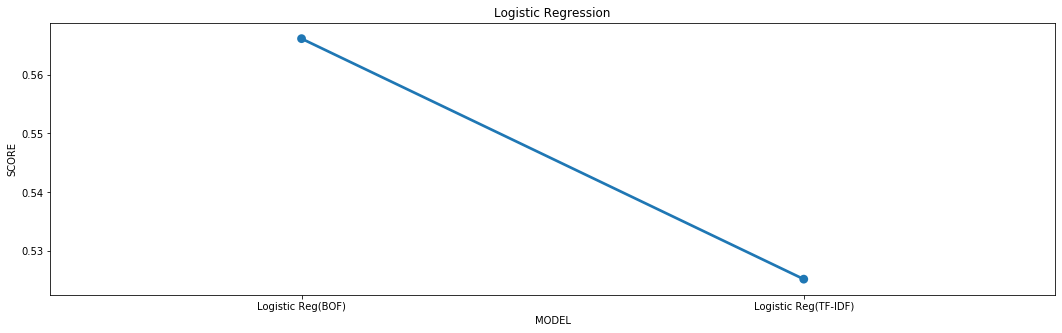

In [25]:
plt.figure(figsize=(18,5))

sns.pointplot(x='model',y='F1-Score',data=model)

plt.title("Logistic Regression")
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()